In [137]:
import pandas as pd
import numpy as np
import matplotlib as mlp
from matplotlib import pyplot as plt

In [16]:
df = pd.read_csv('d:\maschineLearning\zoomcamp\week4\AER_credit_card_data.csv')

In [17]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [20]:
df.card.unique()

array(['yes', 'no'], dtype=object)

In [6]:
df.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [8]:
df.shape

(1319, 12)

In [ ]:
df.churn = (df.churn == 'yes').astype(int)

In [21]:
df.card = (df.card == 'yes').astype(int)
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,0,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,1,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,1,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [24]:
df.card.unique()

array([1, 0])

In [26]:
df.card.value_counts()

1    1023
0     296
Name: card, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)
len(df_train), len(df_val), len(df_test)

(791, 264, 264)

In [54]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train['card']
del df_val['card']
del df_test['card']

In [55]:
df_train.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


In [56]:
df.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [57]:
numerical = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
categorical = ['owner', 'selfemp']

# AUC

In [42]:
from sklearn.metrics import roc_auc_score

In [66]:
auc_list = []
for col in numerical:
    auc = roc_auc_score(y_train, df_train[col])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[col])
    auc_list.append([col, auc.round(3)])
    print('%11s, %.3f' % (col, auc))

    reports, 0.717
        age, 0.524
     income, 0.591
      share, 0.989
expenditure, 0.991
 dependents, 0.533
     months, 0.529
 majorcards, 0.534
     active, 0.604


In [81]:
#chosen_diffs[chosen_diffs[:, 1].argsort()]
auc_arr = np.array(auc_list)
auc_arr[:, 1].argsort()

array([1, 6, 5, 7, 2, 8, 0, 3, 4], dtype=int64)

In [83]:
auc_arr[auc_arr[:, 1].argsort()]

array([['age', '0.524'],
       ['months', '0.529'],
       ['dependents', '0.533'],
       ['majorcards', '0.534'],
       ['income', '0.591'],
       ['active', '0.604'],
       ['reports', '0.717'],
       ['share', '0.989'],
       ['expenditure', '0.991']], dtype='<U32')

In [84]:
# Q1 share

In [ ]:
reports
dependents
active
share

# Training the model

In [85]:
columns = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [92]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [101]:
train_dict = df_train[columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

val_dict = df_val[columns].to_dict(orient='records')
X_val = dv.fit_transform(val_dict)

In [98]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [113]:
model.classes_

array([0, 1])

In [114]:
y_pred = model.predict_proba(X_val)[:,1]

In [106]:
len(y_pred), len(y_val)

(264, 264)

In [118]:
auc_model = roc_auc_score(y_val, y_pred)
auc_model.round(3)  # Q2 0.995

0.995

# Precision and recall

In [119]:
thresholds = np.linspace(0, 1, 101)

In [130]:
precisions = []
recalls = []
for thr in thresholds:
    true_positive = ((y_pred >= thr)&(y_val == 1)).sum()
    false_positive = ((y_pred >= thr)&(y_val == 0)).sum()
    false_negative = ((y_pred < thr)&(y_val == 1)).sum()
    true_negative = ((y_pred < thr)&(y_val == 0)).sum()
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    precisions.append(precision)
    recalls.append(recall)
    print(thr, precision.round(3), recall.round(3))

0.0 0.799 1.0
0.01 0.861 1.0
0.02 0.872 1.0
0.03 0.898 1.0
0.04 0.906 1.0
0.05 0.906 1.0
0.06 0.917 1.0
0.07 0.917 1.0
0.08 0.921 0.995
0.09 0.921 0.995
0.1 0.925 0.995
0.11 0.925 0.995
0.12 0.925 0.995
0.13 0.95 0.995
0.14 0.959 0.986
0.15 0.959 0.986
0.16 0.967 0.986
0.17 0.967 0.986
0.18 0.972 0.981
0.19 0.976 0.981
0.2 0.976 0.981
0.21 0.976 0.981
0.22 0.976 0.981
0.23 0.976 0.981
0.24 0.976 0.976
0.25 0.976 0.976
0.26 0.976 0.976
0.27 0.976 0.976
0.28 0.976 0.976
0.29 0.976 0.976
0.3 0.976 0.972
0.31 0.981 0.972
0.32 0.981 0.972
0.33 0.981 0.972
0.34 0.99 0.972
0.35000000000000003 0.995 0.972
0.36 0.995 0.972
0.37 0.995 0.972
0.38 0.995 0.972
0.39 0.995 0.972
0.4 0.995 0.972
0.41000000000000003 0.995 0.972
0.42 0.995 0.967
0.43 0.995 0.967
0.44 0.995 0.967
0.45 0.995 0.967
0.46 0.995 0.967
0.47000000000000003 0.995 0.967
0.48 0.995 0.967
0.49 0.995 0.967
0.5 0.995 0.967
0.51 0.995 0.967
0.52 0.995 0.967
0.53 0.995 0.967
0.54 0.995 0.967
0.55 0.995 0.967
0.56 0.995 0.967
0.57000000

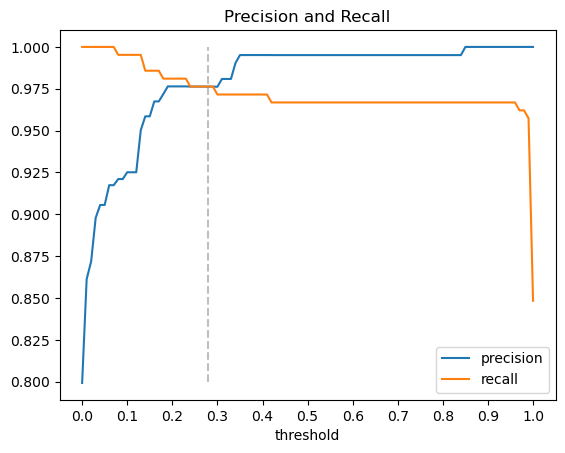

In [174]:
plt.plot(thresholds, precisions, label = 'precision')
plt.plot(thresholds, recalls, label = 'recall')
plt.vlines(0.28, 0.8, 1, color = 'grey', linestyle ='--', alpha =0.5)
plt.title('Precision and Recall')
plt.xlabel('threshold')
plt.xticks(np.linspace(0, 1, 11))
plt.legend()
plt.show()

In [144]:
# Q3 0.3

# F1 score

F1 = 2 * P * R / (P + R)

In [153]:
p = np.array(precisions)
r = np.array(recall)
f1 = 2*p*r/(p+r)
f1

array([0.82306024, 0.85473432, 0.8599597 , 0.87240431, 0.87602635,
       0.87602635, 0.88151615, 0.88151615, 0.88320293, 0.88320293,
       0.8850641 , 0.8850641 , 0.8850641 , 0.89639795, 0.90007373,
       0.90007373, 0.90398553, 0.90398553, 0.90589702, 0.90788361,
       0.90788361, 0.90788361, 0.90788361, 0.90788361, 0.90783529,
       0.90783529, 0.90783529, 0.90783529, 0.90783529, 0.90783529,
       0.90778651, 0.90980091, 0.90980091, 0.90980091, 0.91385665,
       0.91589811, 0.91589811, 0.91589811, 0.91589811, 0.91589811,
       0.91589811, 0.91589811, 0.91588808, 0.91588808, 0.91588808,
       0.91588808, 0.91588808, 0.91588808, 0.91588808, 0.91588808,
       0.91588808, 0.91588808, 0.91588808, 0.91588808, 0.91588808,
       0.91588808, 0.91588808, 0.91588808, 0.91588808, 0.91588808,
       0.91588808, 0.91588808, 0.91588808, 0.91588808, 0.91588808,
       0.91588808, 0.91588808, 0.91588808, 0.91588808, 0.91588808,
       0.91588808, 0.91588808, 0.91588808, 0.91588808, 0.91588

In [162]:
thr_f1 = np.array(list(zip(thresholds, f1)))

In [165]:
thr_f1[thr_f1[:,1].argsort()]

array([[0.        , 0.82306024],
       [0.01      , 0.85473432],
       [0.02      , 0.8599597 ],
       [0.03      , 0.87240431],
       [0.04      , 0.87602635],
       [0.05      , 0.87602635],
       [0.06      , 0.88151615],
       [0.07      , 0.88151615],
       [0.08      , 0.88320293],
       [0.09      , 0.88320293],
       [0.12      , 0.8850641 ],
       [0.11      , 0.8850641 ],
       [0.1       , 0.8850641 ],
       [0.13      , 0.89639795],
       [0.14      , 0.90007373],
       [0.15      , 0.90007373],
       [0.16      , 0.90398553],
       [0.17      , 0.90398553],
       [0.18      , 0.90589702],
       [0.3       , 0.90778651],
       [0.28      , 0.90783529],
       [0.27      , 0.90783529],
       [0.26      , 0.90783529],
       [0.25      , 0.90783529],
       [0.29      , 0.90783529],
       [0.24      , 0.90783529],
       [0.23      , 0.90788361],
       [0.22      , 0.90788361],
       [0.21      , 0.90788361],
       [0.2       , 0.90788361],
       [0.

In [166]:
# Q4 0.4???

# KFold cross-validation

In [178]:
def train_model(df, y):
    data = df[columns].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(data)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)
    
    return model, dv
    

In [193]:
def predict(df, dv, model):
    data = df[columns].to_dict(orient='records')
    X = dv.transform(data)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [194]:
from sklearn.model_selection import KFold

In [195]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [199]:
aucs = []
for train_ind, val_ind in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_ind]
    y_train = df_train.card.values
    
    df_val = df_full_train.iloc[val_ind]
    y_val = df_val.card.values
    
    model, dv = train_model(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)


In [202]:
np.array(aucs).round(3)

array([0.994, 0.994, 0.994, 1.   , 1.   ])

In [205]:
np.std(aucs).round(3) # Q5 0.003

0.003

# Tuning the parameter C

In [206]:
C = [0.01, 0.1, 1, 10]

In [217]:
def train(df, y, C = 0.1):
    data = df[columns].to_dict(orient = 'records')
    
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(data)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)
    
    return dv, model

In [227]:
nfold = 5
kfold = KFold(n_splits=nfold, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    aucs = []
    
    for train_ind, val_ind in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_ind]
        y_train = df_train.card.values
        
        df_val = df_full_train.iloc[val_ind]
        y_val = df_val.card.values
        
        dv, model = train(df_train, y_train, C)
        
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
        
    print('C=%s, auc = %0.3f ± %0.3f' %(C, np.mean(aucs), np.std(aucs)))
        
    

C=0.01, auc = 0.992 ± 0.006
C=0.1, auc = 0.995 ± 0.004
C=1, auc = 0.996 ± 0.003
C=10, auc = 0.996 ± 0.003


In [228]:
#Q6 C= 1